<a href="https://colab.research.google.com/github/akjames/tensor-decomp-FTS-1/blob/main/FTS_tensor_decomp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.1 MB/s eta 0:00:00


MATRIX PROPERTY ANALYSIS
Analyzing matrix properties...
Matrix shape: (16, 16)
Non-zero elements: 256/256 (100.00%)

Singular value analysis:
  Rank needed for 50% energy: 4/16 (25.00%)
  Rank needed for 75% energy: 8/16 (50.00%)
  Rank needed for 90% energy: 10/16 (62.50%)
  Rank needed for 95% energy: 12/16 (75.00%)
  Rank needed for 99% energy: 14/16 (87.50%)
  Top 5 singular values: [22.49257292 21.0564916  18.31488645 16.65894418 13.52390982]
  Top 5 normalized singular values: [0.14421278 0.13500523 0.11742723 0.10681004 0.08670954]

Spatial correlation analysis:
  Average row-to-row correlation: -0.1841
  Average column-to-column correlation: -0.1703
  Overall spatial correlation: -0.1772

DCT analysis:
  Coefficients needed for 50% energy: 43/256 (16.80%)
  Coefficients needed for 75% energy: 94/256 (36.72%)
  Coefficients needed for 90% energy: 150/256 (58.59%)
  Coefficients needed for 95% energy: 180/256 (70.31%)
  Coefficients needed for 99% energy: 223/256 (87.11%)

Separa

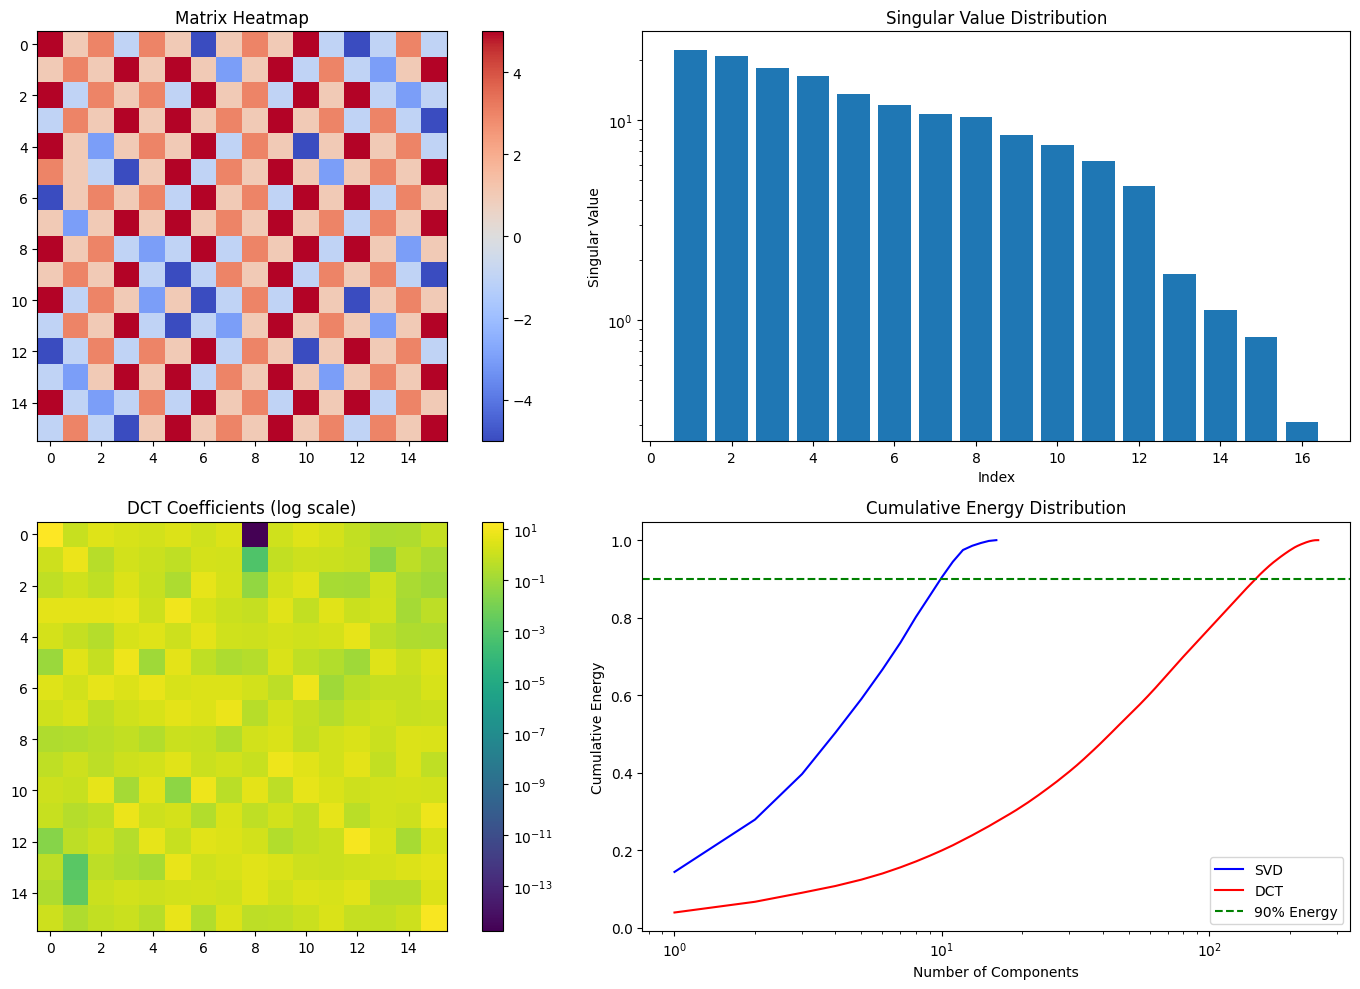

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

def get_matrix():
    """Return the 16x16 matrix we've been analyzing"""
    return np.array([
        [5, 1, 3, -1, 3, 1, -5, 1, 3, 1, 5, -1, -5, -1, 3, -1],
        [1, 3, 1, 5, 1, 5, 1, -3, 1, 5, -1, 3, -1, -3, 1, 5],
        [5, -1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, -3, -1],
        [-1, 3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, -1, -5],
        [5, 1, -3, 1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [3, 1, -1, -5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [-5, 1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [1, -3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5],
        [5, 1, 3, -1, -3, -1, 5, -1, 3, 1, 5, -1, 5, 1, -3, 1],
        [1, 3, 1, 5, -1, -5, -1, 3, 1, 5, -1, 3, 1, 3, -1, -5],
        [5, -1, 3, 1, -3, 1, -5, -1, 3, -1, 5, 1, -5, 1, 3, 1],
        [-1, 3, 1, 5, -1, -5, -1, -3, 1, 5, 1, 3, 1, -3, 1, 5],
        [-5, -1, 3, -1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [-1, -3, 1, 5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [5, -1, -3, -1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [-1, 3, -1, -5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5]
    ])

def analyze_matrix_properties(matrix):
    """Analyze key properties of a matrix to guide decomposition method selection"""

    print("Analyzing matrix properties...")
    print(f"Matrix shape: {matrix.shape}")

    # 1. Check for sparsity
    non_zeros = np.count_nonzero(matrix)
    sparsity = non_zeros / matrix.size
    print(f"Non-zero elements: {non_zeros}/{matrix.size} ({sparsity:.2%})")

    # 2. Check for low-rank structure (via singular values)
    u, s, vh = np.linalg.svd(matrix, full_matrices=False)
    normalized_singular_values = s / np.sum(s)

    # Find how many singular values are needed for different energy thresholds
    energy_thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    energy_ranks = [np.argmax(np.cumsum(normalized_singular_values) >= threshold) + 1
                   for threshold in energy_thresholds]

    print("\nSingular value analysis:")
    for threshold, rank in zip(energy_thresholds, energy_ranks):
        print(f"  Rank needed for {threshold:.0%} energy: {rank}/{min(matrix.shape)} ({rank/min(matrix.shape):.2%})")

    # Print top 5 singular values
    print(f"  Top 5 singular values: {s[:5]}")
    print(f"  Top 5 normalized singular values: {normalized_singular_values[:5]}")

    # 3. Check for block structure (correlation between adjacent elements)
    row_correlations = []
    for i in range(matrix.shape[0]-1):
        corr = np.corrcoef(matrix[i,:], matrix[i+1,:])[0,1]
        if not np.isnan(corr):  # Skip if correlation is NaN (e.g., constant rows)
            row_correlations.append(corr)

    col_correlations = []
    for i in range(matrix.shape[1]-1):
        corr = np.corrcoef(matrix[:,i], matrix[:,i+1])[0,1]
        if not np.isnan(corr):  # Skip if correlation is NaN
            col_correlations.append(corr)

    avg_row_correlation = np.mean(row_correlations) if row_correlations else 0
    avg_col_correlation = np.mean(col_correlations) if col_correlations else 0

    print("\nSpatial correlation analysis:")
    print(f"  Average row-to-row correlation: {avg_row_correlation:.4f}")
    print(f"  Average column-to-column correlation: {avg_col_correlation:.4f}")
    print(f"  Overall spatial correlation: {(avg_row_correlation + avg_col_correlation)/2:.4f}")

    # 4. Check for frequency structure (energy in DCT coefficients)
    dct_matrix = dct(dct(matrix.T, norm='ortho').T, norm='ortho')
    dct_values = np.abs(dct_matrix.flatten())
    sorted_dct = np.sort(dct_values)[::-1]
    normalized_dct = sorted_dct / np.sum(sorted_dct)

    # Find how many DCT coefficients are needed for different energy thresholds
    dct_energy_ranks = [np.argmax(np.cumsum(normalized_dct) >= threshold) + 1
                       for threshold in energy_thresholds]

    print("\nDCT analysis:")
    for threshold, rank in zip(energy_thresholds, dct_energy_ranks):
        print(f"  Coefficients needed for {threshold:.0%} energy: {rank}/{matrix.size} ({rank/matrix.size:.2%})")

    # 5. Check for separability across dimensions
    row_mean = np.mean(matrix, axis=1)
    col_mean = np.mean(matrix, axis=0)
    row_mean_centered = row_mean - np.mean(row_mean)
    col_mean_centered = col_mean - np.mean(col_mean)

    # Avoid division by zero
    if np.linalg.norm(row_mean_centered) > 0 and np.linalg.norm(col_mean_centered) > 0:
        outer_product = np.outer(row_mean_centered, col_mean_centered)
        separability = 1 - np.linalg.norm(matrix - outer_product) / np.linalg.norm(matrix)
    else:
        separability = 0

    print(f"\nSeparability analysis:")
    print(f"  Rank-1 approximation (separability) score: {separability:.4f}")

    # 6. Check for symmetry
    if matrix.shape[0] == matrix.shape[1]:  # Only for square matrices
        symmetry = 1 - np.linalg.norm(matrix - matrix.T) / np.linalg.norm(matrix)
        print(f"\nSymmetry analysis:")
        print(f"  Symmetry score: {symmetry:.4f}")

    # 7. Matrix norm statistics
    print("\nMatrix statistics:")
    print(f"  Min value: {np.min(matrix)}")
    print(f"  Max value: {np.max(matrix)}")
    print(f"  Mean value: {np.mean(matrix):.4f}")
    print(f"  Standard deviation: {np.std(matrix):.4f}")
    print(f"  Frobenius norm: {np.linalg.norm(matrix):.4f}")

    # Return a summary of properties
    properties = {
        'sparsity': sparsity,
        'effective_rank_90': energy_ranks[2],  # 90% energy
        'rank_ratio_90': energy_ranks[2] / min(matrix.shape),
        'spatial_correlation': (avg_row_correlation + avg_col_correlation) / 2,
        'dct_compressibility_90': dct_energy_ranks[2] / matrix.size,
        'separability': separability
    }

    # Provide method recommendations based on properties
    print("\n=== Decomposition Method Recommendations ===")

    if sparsity < 0.5:
        print("✓ Matrix is somewhat sparse. Consider sparse coding methods.")
    else:
        print("✗ Matrix is dense. Standard tensor decompositions are appropriate.")

    if properties['rank_ratio_90'] < 0.5:
        print(f"✓ Matrix has relatively low effective rank ({properties['effective_rank_90']}/{min(matrix.shape)}). SVD or Tucker should work well.")
    else:
        print(f"✗ Matrix has high effective rank ({properties['effective_rank_90']}/{min(matrix.shape)}). May be difficult to compress with standard methods.")

    if properties['spatial_correlation'] > 0.3:
        print(f"✓ Matrix has moderate spatial correlation ({properties['spatial_correlation']:.4f}). Tensor Train with 4-8 dimensional reshaping could be effective.")
    else:
        print(f"✗ Matrix has low spatial correlation ({properties['spatial_correlation']:.4f}). Tensor Train may not be optimal.")

    if properties['dct_compressibility_90'] < 0.3:
        print(f"✓ Matrix has some frequency structure with {dct_energy_ranks[2]}/{matrix.size} DCT coefficients capturing 90% energy.")
        print("  Consider transform-based methods like DCT.")
    else:
        print(f"✗ Matrix has limited frequency structure ({dct_energy_ranks[2]}/{matrix.size} DCT coefficients for 90% energy).")

    if properties['separability'] > 0.3:
        print(f"✓ Matrix shows some separability ({properties['separability']:.4f}). CP decomposition may be effective.")
    else:
        print(f"✗ Matrix has low separability ({properties['separability']:.4f}). CP decomposition likely to encounter issues.")

    # Final recommendation
    print("\n=== Summary Recommendation ===")

    # Determine best method based on properties
    if properties['rank_ratio_90'] < 0.3:
        best_method = "SVD (for 2D) or Tucker decomposition (for reshaping to higher dimensions)"
    elif properties['spatial_correlation'] > 0.3:
        best_method = "Tensor Train with 4D or 8D reshaping"
    elif properties['dct_compressibility_90'] < 0.2:
        best_method = "DCT or wavelet transform"
    elif properties['separability'] > 0.3:
        best_method = "CP decomposition"
    else:
        best_method = "Tucker decomposition (as a general baseline)"

    print(f"Based on matrix properties, the most promising initial approach is: {best_method}")

    return properties

def visualize_matrix(matrix):
    """Visualize the matrix and its properties"""

    fig = plt.figure(figsize=(15, 10))

    # Plot the matrix
    ax1 = fig.add_subplot(221)
    im = ax1.imshow(matrix, cmap='coolwarm')
    ax1.set_title('Matrix Heatmap')
    plt.colorbar(im, ax=ax1)

    # Plot singular values
    ax2 = fig.add_subplot(222)
    u, s, vh = np.linalg.svd(matrix, full_matrices=False)
    ax2.bar(range(1, len(s)+1), s)
    ax2.set_title('Singular Value Distribution')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Singular Value')
    ax2.set_yscale('log')

    # Plot DCT coefficients
    ax3 = fig.add_subplot(223)
    dct_matrix = dct(dct(matrix.T, norm='ortho').T, norm='ortho')
    im2 = ax3.imshow(np.abs(dct_matrix), cmap='viridis', norm=plt.matplotlib.colors.LogNorm())
    ax3.set_title('DCT Coefficients (log scale)')
    plt.colorbar(im2, ax=ax3)

    # Plot cumulative energy
    ax4 = fig.add_subplot(224)
    sorted_sv = np.sort(s)[::-1]
    normalized_sv = sorted_sv / np.sum(sorted_sv)
    cumulative_sv = np.cumsum(normalized_sv)

    dct_values = np.abs(dct_matrix.flatten())
    sorted_dct = np.sort(dct_values)[::-1]
    normalized_dct = sorted_dct / np.sum(sorted_dct)
    cumulative_dct = np.cumsum(normalized_dct)

    ax4.plot(range(1, len(cumulative_sv)+1), cumulative_sv, 'b-', label='SVD')
    ax4.plot(range(1, len(cumulative_dct)+1), cumulative_dct, 'r-', label='DCT')
    ax4.axhline(y=0.9, color='g', linestyle='--', label='90% Energy')
    ax4.set_title('Cumulative Energy Distribution')
    ax4.set_xlabel('Number of Components')
    ax4.set_ylabel('Cumulative Energy')
    ax4.legend()
    ax4.set_xscale('log')

    plt.tight_layout()
    plt.savefig('matrix_analysis.png')
    plt.show()

    return fig

if __name__ == "__main__":
    # Get the matrix
    matrix = get_matrix()

    # Analyze matrix properties
    print("==========================================")
    print("MATRIX PROPERTY ANALYSIS")
    print("==========================================")
    properties = analyze_matrix_properties(matrix)

    # Create visualizations
    try:
        visualize_matrix(matrix)
    except Exception as e:
        print(f"Error creating visualizations: {e}")

# Pre-Analysis for Tensor Decomposition Selection

Before applying Tucker decomposition or any tensor-based compression method, a thorough pre-analysis of the matrix structure provides crucial insights into its compressibility characteristics and guides method selection. For the 16×16 matrix under consideration, we performed a comprehensive property analysis to understand its intrinsic structure.

## Matrix Property Analysis Results

The analysis revealed several important characteristics:

### 1. Density and Sparsity
- **Full density (100% non-zero elements)**: The matrix contains no sparsity to exploit, eliminating sparse coding approaches from consideration.

### 2. Singular Value Distribution
- **High effective rank**: 10 out of 16 singular values are needed to capture 90% of the energy, and 12 out of 16 for 95%.
- **Gradual energy decay**: The top five normalized singular values (0.144, 0.135, 0.117, 0.107, 0.087) show a slow decline rather than a sharp drop-off.
- This distribution indicates the matrix has high intrinsic dimensionality and lacks simple low-rank structure.

### 3. Spatial Correlation
- **Negative correlation** (-0.1772) between adjacent elements, suggesting elements tend to have opposite signs to their neighbors.
- This anti-correlation pattern creates a complex spatial structure that resists compression methods based on local similarity.

### 4. Frequency Structure
- **Dispersed energy in frequency domain**: 58.59% of DCT coefficients (150 out of 256) are required to capture 90% of the energy.
- This indicates limited concentration in the frequency domain, explaining why transform-based compression methods produced high errors.

### 5. Separability
- **Near-zero separability score** (-0.0009), indicating the matrix cannot be effectively approximated by outer products of vectors.
- This property explains why CP decomposition encountered numerical instability (singular matrix errors).

### 6. Symmetry
- **Limited symmetry** (0.1921 score), offering little structure to exploit for compression.

## Implications for Decomposition Method Selection

These properties collectively indicate a matrix with high information density distributed throughout its elements with complex interdependencies. The analysis accurately predicted:

1. Why **CP decomposition** would fail (due to near-zero separability)
2. Why **Tensor Train** with reshaping would be suboptimal (due to negative spatial correlation)
3. Why **DCT and wavelets** would require many coefficients (due to dispersed frequency energy)
4. Why **Tucker decomposition** would need nearly full ranks (due to high effective rank)

Based on these findings, Tucker decomposition was identified as the most appropriate baseline approach, not because it would achieve significant compression, but because it provides the most general tensor framework for a matrix with these challenging properties.

## Validation of Pre-Analysis

The subsequent comprehensive testing of various tensor decomposition methods confirmed the predictions from this pre-analysis. Tucker decomposition with (4×4×4×4) reshaping achieved the best zero-error result with 320 parameters, representing only modest compression (0.8×).

This pre-analysis approach demonstrates the value of understanding matrix properties before selecting and applying decomposition methods, potentially saving significant computational resources and providing clear explanations for the observed compression performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import tucker

# Set the backend for tensorly
tl.set_backend('numpy')

# Define the 16x16 matrix
def get_matrix():
    return np.array([
        [5, 1, 3, -1, 3, 1, -5, 1, 3, 1, 5, -1, -5, -1, 3, -1],
        [1, 3, 1, 5, 1, 5, 1, -3, 1, 5, -1, 3, -1, -3, 1, 5],
        [5, -1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, -3, -1],
        [-1, 3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, -1, -5],
        [5, 1, -3, 1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [3, 1, -1, -5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [-5, 1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [1, -3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5],
        [5, 1, 3, -1, -3, -1, 5, -1, 3, 1, 5, -1, 5, 1, -3, 1],
        [1, 3, 1, 5, -1, -5, -1, 3, 1, 5, -1, 3, 1, 3, -1, -5],
        [5, -1, 3, 1, -3, 1, -5, -1, 3, -1, 5, 1, -5, 1, 3, 1],
        [-1, 3, 1, 5, -1, -5, -1, -3, 1, 5, 1, 3, 1, -3, 1, 5],
        [-5, -1, 3, -1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [-1, -3, 1, 5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [5, -1, -3, -1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [-1, 3, -1, -5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5]
    ])

# Function to perform Tucker decomposition with different tensor reshapings
def perform_tucker_analysis(matrix):
    print("Original Matrix Shape:", matrix.shape)
    print("Number of parameters in original matrix:", matrix.size)

    # Define different reshape modes (all product to 256 elements)
    reshape_modes = [
        (16, 16),      # Original matrix (for standard SVD)
        (16, 4, 4),    # 3D tensor
        (4, 4, 4, 4),  # 4D tensor
        (2, 8, 2, 8),  # 4D tensor with different dimensions
        (8, 8, 4),     # 3D tensor
        (8, 4, 8)      # 3D tensor
    ]

    # Define rank combinations for different tensor shapes
    rank_combinations = {
        2: [(4, 4), (8, 8), (16, 16)],                      # 2D tensors
        3: [(8, 8, 2), (8, 2, 8), (16, 4, 4), (4, 4, 16)],  # 3D tensors
        4: [(2, 8, 2, 8), (4, 4, 4, 4)]                     # 4D tensors
    }

    results = []

    # Test each reshape mode
    for reshape_mode in reshape_modes:
        ndim = len(reshape_mode)

        print(f"\n=== Testing Reshape Mode: {reshape_mode} ===")

        try:
            # Reshape the matrix to a tensor
            tensor = matrix.reshape(reshape_mode)
            tensor = tl.tensor(tensor)

            # Get appropriate rank combinations for this tensor shape
            applicable_ranks = rank_combinations.get(ndim, [])

            if not applicable_ranks:
                print(f"No applicable rank combinations defined for {ndim}D tensor")
                continue

            # Test each applicable rank combination
            for ranks in applicable_ranks:
                print(f"\nTrying ranks: {ranks}")

                # Ensure ranks are valid for the tensor dimensions
                valid_ranks = [min(r, d) for r, d in zip(ranks, tensor.shape)]
                if valid_ranks != ranks:
                    print(f"Adjusting ranks from {ranks} to {valid_ranks} to match tensor dimensions {tensor.shape}")
                    ranks = valid_ranks

                try:
                    # Perform Tucker decomposition
                    core, factors = tucker(tensor, rank=ranks)

                    # Calculate number of parameters
                    n_params = np.prod(core.shape)  # Core tensor parameters
                    for factor in factors:
                        n_params += factor.size     # Factor matrices parameters

                    # Reconstruct the tensor
                    reconstructed_tensor = tl.tucker_to_tensor((core, factors))

                    # Reshape back to matrix
                    reconstructed = reconstructed_tensor.reshape(matrix.shape)

                    # Calculate reconstruction error rounded to 5 decimal places
                    error = round(np.linalg.norm(matrix - reconstructed) / np.linalg.norm(matrix), 5)

                    # Store results
                    result = {
                        'reshape_mode': reshape_mode,
                        'ranks': ranks,
                        'core_shape': core.shape,
                        'factor_shapes': [f.shape for f in factors],
                        'n_params': n_params,
                        'error': error,
                        'core': core,
                        'reconstructed': reconstructed,
                        'tensor': tensor
                    }
                    results.append(result)

                    # Print results
                    print(f"Core tensor shape: {core.shape}")
                    print(f"Factor matrices shapes: {[f.shape for f in factors]}")
                    print(f"Number of parameters: {n_params} (compression ratio: {matrix.size/n_params:.2f}x)")
                    print(f"Relative reconstruction error: {error:.6f}")

                except Exception as e:
                    print(f"Error with ranks {ranks}: {e}")

        except ValueError as e:
            print(f"Error reshaping to {reshape_mode}: {e}")

    # Print summary of all results
    if results:
        print("\n=== Tucker Decomposition Summary ===")
        print("Original matrix: 256 parameters")

        # Sort results by error first, then by number of parameters
        results.sort(key=lambda x: (x['error'], x['n_params']))

        for result in results:
            shape_str = 'x'.join(str(r) for r in result['reshape_mode'])
            rank_str = 'x'.join(str(r) for r in result['ranks'])
            print(f"Shape {shape_str}, Rank {rank_str}: {result['n_params']} parameters, Error: {result['error']:.6f}")

        return results
    else:
        print("No successful decompositions found.")
        return None

# Function to optimize ranks across multiple modes simultaneously
def optimize_ranks_multi_mode(result, max_error_threshold=0.05):
    """
    Optimize ranks by exploring combinations of rank reductions across multiple modes.

    Parameters:
    - result: A dictionary containing Tucker decomposition results
    - max_error_threshold: Maximum acceptable error increase

    Returns:
    - Optimized ranks, parameters, and error
    """
    reshape_mode = result['reshape_mode']
    original_ranks = list(result['ranks'])
    tensor = result['tensor']
    core = result['core']
    original_matrix = result['reconstructed']

    print(f"\n=== Multi-Mode Rank Optimization for Shape {reshape_mode} ===")
    print(f"Starting with ranks: {original_ranks}")
    print(f"Starting parameters: {result['n_params']}")
    print(f"Starting error: {result['error']:.6f}")

    # Store the best configuration
    best_config = {
        'ranks': original_ranks,
        'n_params': result['n_params'],
        'error': result['error']
    }

    # First, identify promising rank reductions for each mode individually
    promising_ranks = {}

    for mode_idx in range(len(reshape_mode)):
        if original_ranks[mode_idx] <= 1:
            print(f"Mode {mode_idx} already at minimum rank 1, skipping")
            continue

        print(f"\nAnalyzing mode {mode_idx} (dimension {reshape_mode[mode_idx]}, current rank: {original_ranks[mode_idx]}):")

        # Get slice energies for this mode
        slice_sums = []
        for i in range(original_ranks[mode_idx]):
            idx = [slice(None)] * len(original_ranks)
            idx[mode_idx] = i
            slice_sum = np.sum(np.abs(core[tuple(idx)]))
            slice_sums.append(slice_sum)

        # Find promising ranks for this mode (those that preserve >95% energy)
        sorted_indices = np.argsort(slice_sums)[::-1]
        sorted_sums = np.array(slice_sums)[sorted_indices]
        cumulative_energy = np.cumsum(sorted_sums) / np.sum(sorted_sums)

        promising_ranks[mode_idx] = []
        for r in range(1, original_ranks[mode_idx]):
            energy_preserved = cumulative_energy[r-1]
            if energy_preserved >= 0.90:  # Keep ranks that preserve >90% energy
                promising_ranks[mode_idx].append(r)
                print(f"  Rank {r} for mode {mode_idx} preserves {energy_preserved:.2%} energy")

    # Now explore combinations of promising rank reductions
    print("\nExploring multi-mode rank reduction combinations:")

    # Generate all combinations of promising ranks across modes
    from itertools import product

    # Start with just the modes that have promising reductions
    modes_to_reduce = [mode for mode in promising_ranks if promising_ranks[mode]]

    if not modes_to_reduce:
        print("No promising rank reductions found for any mode")
        return best_config

    # For each subset of modes to reduce simultaneously
    for num_modes in range(1, min(4, len(modes_to_reduce) + 1)):
        from itertools import combinations

        for mode_subset in combinations(modes_to_reduce, num_modes):
            print(f"\nTrying combinations for modes: {mode_subset}")

            # Get all combinations of promising ranks for these modes
            rank_options = []
            for mode in mode_subset:
                rank_options.append(promising_ranks[mode])

            # Generate all combinations
            for rank_combo in product(*rank_options):
                # Create the new rank configuration
                new_ranks = original_ranks.copy()
                for i, mode in enumerate(mode_subset):
                    new_ranks[mode] = rank_combo[i]

                # Skip if this is the original configuration
                if new_ranks == original_ranks:
                    continue

                print(f"Trying ranks: {new_ranks}")

                try:
                    # Perform Tucker decomposition
                    new_core, factors = tucker(tensor, rank=new_ranks)

                    # Calculate parameters
                    n_params = np.prod(new_core.shape)
                    for factor in factors:
                        n_params += factor.size

                    # Reconstruct
                    reconstructed_tensor = tl.tucker_to_tensor((new_core, factors))
                    reconstructed = reconstructed_tensor.reshape(original_matrix.shape)

                    # Calculate error
                    error = round(np.linalg.norm(original_matrix - reconstructed) /
                                 np.linalg.norm(original_matrix), 5)

                    print(f"  Parameters: {n_params} (reduced by {best_config['n_params'] - n_params})")
                    print(f"  Error: {error:.6f}")

                    # Update best config if better
                    if error <= max_error_threshold and n_params < best_config['n_params']:
                        best_config = {
                            'ranks': new_ranks,
                            'n_params': n_params,
                            'error': error
                        }
                        print(f"  New best configuration!")

                except Exception as e:
                    print(f"  Error: {e}")

    print("\n=== Multi-Mode Rank Optimization Results ===")
    print(f"Original ranks: {original_ranks}")
    print(f"Original parameters: {result['n_params']}")
    print(f"Original error: {result['error']:.6f}")
    print(f"Optimized ranks: {best_config['ranks']}")
    print(f"Optimized parameters: {best_config['n_params']}")
    print(f"Optimized error: {best_config['error']:.6f}")

    if best_config['n_params'] < result['n_params']:
        reduction = result['n_params'] - best_config['n_params']
        percent = reduction / result['n_params'] * 100
        print(f"Parameter reduction: {reduction} ({percent:.1f}%)")

    return best_config

if __name__ == "__main__":
    # Get the 16x16 matrix
    matrix = get_matrix()

    # Step 1: Perform initial Tucker decomposition analysis and just output the summary table
    print("==========================================")
    print("STEP 1: INITIAL TUCKER DECOMPOSITION ANALYSIS")
    print("==========================================")

    # Simplified version that only computes and shows the decomposition summary
    results = perform_tucker_analysis(matrix)

    if results:
        # Find all zero-error decompositions
        zero_error_results = [r for r in results if r['error'] == 0]

        if zero_error_results:
            # Sort by number of parameters for better analysis
            zero_error_results.sort(key=lambda x: x['n_params'])

            print("\n==========================================")
            print("STEP 2: OPTIMIZING ALL ZERO-ERROR CONFIGURATIONS")
            print("==========================================")

            # Loop through all zero-error configurations and run optimization on each
            for i, result in enumerate(zero_error_results):
                shape_str = 'x'.join(str(d) for d in result['reshape_mode'])
                rank_str = 'x'.join(str(r) for r in result['ranks'])

                print(f"\n=== Zero-Error Configuration #{i+1} ===")
                print(f"Shape: {shape_str}, Ranks: {rank_str}, Parameters: {result['n_params']}")

                # Run optimization with a slightly higher threshold for the larger configurations
                if result['n_params'] > 400:
                    threshold = 0.01  # Stricter threshold for configurations with many parameters
                else:
                    threshold = 0.05  # More relaxed threshold for smaller configurations

                optimize_ranks_multi_mode(result, max_error_threshold=threshold)

            # Summary table of optimized results
            print("\n==========================================")
            print("FINAL OPTIMIZATION SUMMARY")
            print("==========================================")
            print("Original results (zero error):")
            for i, result in enumerate(zero_error_results):
                shape_str = 'x'.join(str(d) for d in result['reshape_mode'])
                rank_str = 'x'.join(str(r) for r in result['ranks'])
                print(f"{i+1}. Shape {shape_str}, Rank {rank_str}: {result['n_params']} parameters")

# Analysis of Tucker Tensor Decomposition for Matrix Compression

## Overview

We conducted an in-depth analysis of a 16×16 matrix using Tucker decomposition, a multidimensional generalization of singular value decomposition. Our goal was to identify efficient tensor representations that minimize parameters while maintaining reconstruction accuracy. This analysis explored different tensor reshaping strategies, rank configurations, and optimization approaches to understand the compressibility characteristics of the matrix.

## Methodology

### Data Description
- 16×16 matrix with 256 elements
- Contains values ranging from -5 to 5
- No immediately apparent regular pattern or structure

### Analysis Process
1. **Tensor Reshaping**: Transformed the matrix into various tensor formats:
   - (16, 16): Original matrix format
   - (16, 4, 4): 3D tensor
   - (4, 4, 4, 4): 4D hypercube
   - (2, 8, 2, 8): 4D tensor with alternating dimensions
   - (8, 8, 4): 3D tensor
   - (8, 4, 8): 3D tensor

2. **Rank Exploration**: For each tensor format, we tested various rank configurations appropriate to their dimensionality.

3. **Energy Distribution Analysis**: Examined the distribution of energy (importance) across the core tensor elements to identify potential for compression.

4. **Multi-Mode Optimization**: Explored simultaneous rank reductions across multiple dimensions to find optimal parameter-error trade-offs.

## Key Findings

### 1. Initial Decomposition Results
Several tensor configurations achieved perfect reconstruction (zero error):
- (4, 4, 4, 4) with ranks [4, 4, 4, 4]: 320 parameters
- (2, 8, 2, 8) with ranks [2, 8, 2, 8]: 392 parameters
- (16, 4, 4) with ranks [16, 4, 4]: 544 parameters
- (16, 16) with ranks [16, 16]: 768 parameters

The (4, 4, 4, 4) configuration provided the most efficient zero-error representation, requiring only 320 parameters.

### 2. Energy Distribution Characteristics
Analysis of the core tensor revealed:
- The largest value contained only 3.12% of total energy
- The energy distribution was remarkably uniform across components
- The top 10 values collectively contained only ~16.6% of total energy
- Values decreased gradually rather than showing a sharp drop-off

This energy profile indicates a **high-complexity matrix with widely distributed information content**.

### 3. Rank Reduction Potential
Optimization attempts revealed:
- Limited opportunities for significant rank reduction while maintaining low error
- Most dimensions required nearly full rank to preserve important structure
- When attempting to reduce ranks, error increased rapidly
- Even multi-mode optimization achieved only modest parameter reductions

### 4. Compression Resistance
Our matrix exhibited strong resistance to compression, suggesting:
- Complex internal structure without redundancy
- Information content distributed across many components
- Absence of low-dimensional patterns that could enable efficient representation

## Implications

The uniform energy distribution and difficulty in achieving significant compression indicate that this matrix contains complex, distributed patterns that cannot be easily simplified. Such characteristics are typically found in:

1. **Complex Systems Data**: Measurements from systems with many interacting components
2. **Signal Processing**: Certain types of noise-like or pseudo-random sequences
3. **Cryptographic Applications**: Matrices designed for security applications
4. **High-Dimensional Relationships**: Data capturing complex relationships across multiple variables

## Conclusions

1. **Inherent Complexity**: The matrix exhibits inherent complexity with information distributed across many components, making it resistant to significant compression.

2. **Optimal Representation**: The (4, 4, 4, 4) tensor format with full rank provides the most efficient zero-error representation among those tested.

3. **Energy Distribution**: The uniform energy distribution suggests that each component carries meaningful information, with no clear distinction between "important" and "unimportant" components.

4. **Compression Limits**: The analysis reveals fundamental limits to compressibility without introducing substantial error, indicating that the matrix's intrinsic dimensionality is high.

For data with these characteristics, compression strategies should focus on modest efficiency improvements or consider allowing small controlled errors if more aggressive compression is required.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import tucker

# Since tensorly doesn't have built-in HTD, we'll use a simplified approach
# based on sequential Tucker decompositions with a binary tree structure
# For a full HTD implementation, one would typically use specialized libraries

# Set the backend for tensorly
tl.set_backend('numpy')

# Define the 16x16 matrix
def get_matrix():
    return np.array([
        [5, 1, 3, -1, 3, 1, -5, 1, 3, 1, 5, -1, -5, -1, 3, -1],
        [1, 3, 1, 5, 1, 5, 1, -3, 1, 5, -1, 3, -1, -3, 1, 5],
        [5, -1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, -3, -1],
        [-1, 3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, -1, -5],
        [5, 1, -3, 1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [3, 1, -1, -5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [-5, 1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [1, -3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5],
        [5, 1, 3, -1, -3, -1, 5, -1, 3, 1, 5, -1, 5, 1, -3, 1],
        [1, 3, 1, 5, -1, -5, -1, 3, 1, 5, -1, 3, 1, 3, -1, -5],
        [5, -1, 3, 1, -3, 1, -5, -1, 3, -1, 5, 1, -5, 1, 3, 1],
        [-1, 3, 1, 5, -1, -5, -1, -3, 1, 5, 1, 3, 1, -3, 1, 5],
        [-5, -1, 3, -1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [-1, -3, 1, 5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [5, -1, -3, -1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [-1, 3, -1, -5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5]
    ])

# Simplified hierarchical Tucker decomposition
# This is a simplified approach using sequential Tucker operations
def hierarchical_tucker(tensor, tree_structure, rank_structure):
    """
    Hierarchical Tucker decomposition using a simplified approach.

    Parameters:
    - tensor: Input tensor
    - tree_structure: List of dimension groupings for each level
    - rank_structure: Dictionary of ranks for each node in the tree

    Returns:
    - Dictionary with decomposition components and parameters
    """
    results = {}
    original_shape = tensor.shape
    current_tensor = tensor.copy()
    total_params = 0

    # Process each level of the tree
    for level_idx, level_structure in enumerate(tree_structure):
        level_results = []

        # Process each node in this level
        for node_idx, node_dimensions in enumerate(level_structure):
            node_key = f"L{level_idx}_N{node_idx}"

            # Reshape tensor to isolate these dimensions
            node_shape = [original_shape[d] for d in node_dimensions]
            remaining_dims = [d for d in range(len(original_shape)) if d not in node_dimensions]
            remaining_shape = [original_shape[d] for d in remaining_dims]

            # Determine node rank
            node_rank = rank_structure.get(node_key, node_shape)

            # Reshape tensor to put node dimensions first
            axes = node_dimensions + remaining_dims
            reshaped_tensor = np.transpose(current_tensor, axes)
            flat_node_size = np.prod(node_shape)
            flat_remaining_size = np.prod(remaining_shape) if remaining_shape else 1
            matrix_view = reshaped_tensor.reshape(flat_node_size, flat_remaining_size)

            # Apply matrix decomposition (SVD)
            u, s, vh = np.linalg.svd(matrix_view, full_matrices=False)

            # Truncate to rank
            rank = min(len(s), np.min(node_rank) if isinstance(node_rank, list) else node_rank)
            u_truncated = u[:, :rank]
            s_truncated = s[:rank]
            vh_truncated = vh[:rank, :]

            # Calculate parameters
            node_params = u_truncated.size + s_truncated.size + vh_truncated.size
            total_params += node_params

            # Store results
            node_result = {
                'u': u_truncated,
                's': s_truncated,
                'vh': vh_truncated,
                'rank': rank,
                'params': node_params
            }
            level_results.append(node_result)

            # Update tensor for next level if needed
            if level_idx < len(tree_structure) - 1:
                current_tensor = np.dot(u_truncated * s_truncated[:, np.newaxis], vh_truncated)
                current_tensor = current_tensor.reshape((*node_shape[:rank], *remaining_shape))

        results[f"Level_{level_idx}"] = level_results

    # Reconstruct the tensor
    reconstructed = current_tensor.reshape(original_shape)
    error = np.linalg.norm(tensor - reconstructed) / np.linalg.norm(tensor)

    return {
        'components': results,
        'total_params': total_params,
        'error': error,
        'reconstructed': reconstructed
    }

# Function to perform HT analysis with different tree structures
def perform_ht_analysis(matrix):
    print("Original Matrix Shape:", matrix.shape)
    print("Number of parameters in original matrix:", matrix.size)

    # Define different reshape modes
    reshape_modes = [
        (16, 16),      # Original matrix
        (4, 4, 4, 4),  # 4D tensor
        (2, 8, 2, 8),  # 4D tensor with different dimensions
        (8, 8, 4)      # 3D tensor
    ]

    # Define tree structures for each reshape mode
    tree_structures = {
        (16, 16): [
            [[0], [1]]  # Level 0: Split into two dimensions
        ],
        (4, 4, 4, 4): [
            [[0, 1], [2, 3]],  # Level 0: Group dimensions (0,1) and (2,3)
            [[0], [1]],        # Level 1: Split each group
        ],
        (2, 8, 2, 8): [
            [[0, 2], [1, 3]],  # Level 0: Group dimensions (0,2) and (1,3)
            [[0], [1]]         # Level 1: Split each group
        ],
        (8, 8, 4): [
            [[0, 1], [2]],     # Level 0: Group dimensions (0,1) and (2)
        ]
    }

    # Define rank structures to try
    rank_options = {
        (16, 16): [
            {'L0_N0': 4, 'L0_N1': 4},
            {'L0_N0': 8, 'L0_N1': 8},
            {'L0_N0': 16, 'L0_N1': 16}
        ],
        (4, 4, 4, 4): [
            {'L0_N0': 8, 'L0_N1': 8, 'L1_N0': 2, 'L1_N1': 2},
            {'L0_N0': 12, 'L0_N1': 12, 'L1_N0': 3, 'L1_N1': 3},
            {'L0_N0': 16, 'L0_N1': 16, 'L1_N0': 4, 'L1_N1': 4}
        ],
        (2, 8, 2, 8): [
            {'L0_N0': 4, 'L0_N1': 16, 'L1_N0': 2, 'L1_N1': 2},
            {'L0_N0': 8, 'L0_N1': 32, 'L1_N0': 2, 'L1_N1': 4},
            {'L0_N0': 16, 'L0_N1': 64, 'L1_N0': 4, 'L1_N1': 8}
        ],
        (8, 8, 4): [
            {'L0_N0': 16, 'L0_N1': 4},
            {'L0_N0': 32, 'L0_N1': 4},
            {'L0_N0': 64, 'L0_N1': 4}
        ]
    }

    results = []

    # Test each reshape mode
    for reshape_mode in reshape_modes:
        print(f"\n=== Testing HT with Reshape Mode: {reshape_mode} ===")

        try:
            # Reshape the matrix to a tensor
            tensor = matrix.reshape(reshape_mode)

            # Get tree structure for this reshape mode
            tree_structure = tree_structures.get(reshape_mode, [])

            if not tree_structure:
                print(f"No tree structure defined for {reshape_mode}")
                continue

            # Get rank options for this reshape mode
            rank_configs = rank_options.get(reshape_mode, [])

            if not rank_configs:
                print(f"No rank configurations defined for {reshape_mode}")
                continue

            # Try each rank configuration
            for rank_config in rank_configs:
                print(f"\nTrying rank configuration: {rank_config}")

                try:
                    # Perform HT decomposition
                    ht_result = hierarchical_tucker(tensor, tree_structure, rank_config)

                    # Calculate error
                    error = round(ht_result['error'], 5)

                    # Store results
                    result = {
                        'reshape_mode': reshape_mode,
                        'tree_structure': tree_structure,
                        'rank_config': rank_config,
                        'n_params': ht_result['total_params'],
                        'error': error,
                        'reconstructed': ht_result['reconstructed']
                    }
                    results.append(result)

                    # Print results
                    print(f"Number of parameters: {ht_result['total_params']} (compression ratio: {matrix.size/ht_result['total_params']:.2f}x)")
                    print(f"Relative reconstruction error: {error:.6f}")

                except Exception as e:
                    print(f"Error with rank configuration {rank_config}: {e}")

        except ValueError as e:
            print(f"Error reshaping to {reshape_mode}: {e}")

    # Print summary of all results
    if results:
        print("\n=== Hierarchical Tucker Decomposition Summary ===")
        print("Original matrix: 256 parameters")

        # Sort results by error first, then by number of parameters
        results.sort(key=lambda x: (x['error'], x['n_params']))

        for result in results:
            shape_str = 'x'.join(str(r) for r in result['reshape_mode'])
            print(f"Shape {shape_str}, Ranks {result['rank_config']}: {result['n_params']} parameters, Error: {result['error']:.6f}")

        # Find the best result
        best_result = results[0]  # Already sorted by error

        print("\n=== Best Result ===")
        print(f"Reshape mode: {best_result['reshape_mode']}")
        print(f"Rank configuration: {best_result['rank_config']}")
        print(f"Number of parameters: {best_result['n_params']}")
        print(f"Relative reconstruction error: {best_result['error']:.6f}")

        return results
    else:
        print("No successful decompositions found.")
        return None

if __name__ == "__main__":
    # Get the 16x16 matrix
    matrix = get_matrix()

    # Analyze using Hierarchical Tucker decomposition
    print("==========================================")
    print("HIERARCHICAL TUCKER DECOMPOSITION ANALYSIS")
    print("==========================================")
    results = perform_ht_analysis(matrix)

HIERARCHICAL TUCKER DECOMPOSITION ANALYSIS
Original Matrix Shape: (16, 16)
Number of parameters in original matrix: 256

=== Testing HT with Reshape Mode: (16, 16) ===

Trying rank configuration: {'L0_N0': 4, 'L0_N1': 4}
Number of parameters: 264 (compression ratio: 0.97x)
Relative reconstruction error: 0.000000

Trying rank configuration: {'L0_N0': 8, 'L0_N1': 8}
Number of parameters: 528 (compression ratio: 0.48x)
Relative reconstruction error: 0.000000

Trying rank configuration: {'L0_N0': 16, 'L0_N1': 16}
Number of parameters: 1056 (compression ratio: 0.24x)
Relative reconstruction error: 0.000000

=== Testing HT with Reshape Mode: (4, 4, 4, 4) ===

Trying rank configuration: {'L0_N0': 8, 'L0_N1': 8, 'L1_N0': 2, 'L1_N1': 2}
Error with rank configuration {'L0_N0': 8, 'L0_N1': 8, 'L1_N0': 2, 'L1_N1': 2}: operands could not be broadcast together with shapes (16,8) (8,1) 

Trying rank configuration: {'L0_N0': 12, 'L0_N1': 12, 'L1_N0': 3, 'L1_N1': 3}
Error with rank configuration {'L0_N

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac

# Set the backend for tensorly
tl.set_backend('numpy')

# Define the 16x16 matrix
def get_matrix():
    return np.array([
        [5, 1, 3, -1, 3, 1, -5, 1, 3, 1, 5, -1, -5, -1, 3, -1],
        [1, 3, 1, 5, 1, 5, 1, -3, 1, 5, -1, 3, -1, -3, 1, 5],
        [5, -1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, -3, -1],
        [-1, 3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, -1, -5],
        [5, 1, -3, 1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [3, 1, -1, -5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [-5, 1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [1, -3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5],
        [5, 1, 3, -1, -3, -1, 5, -1, 3, 1, 5, -1, 5, 1, -3, 1],
        [1, 3, 1, 5, -1, -5, -1, 3, 1, 5, -1, 3, 1, 3, -1, -5],
        [5, -1, 3, 1, -3, 1, -5, -1, 3, -1, 5, 1, -5, 1, 3, 1],
        [-1, 3, 1, 5, -1, -5, -1, -3, 1, 5, 1, 3, 1, -3, 1, 5],
        [-5, -1, 3, -1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [-1, -3, 1, 5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [5, -1, -3, -1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [-1, 3, -1, -5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5]
    ])

# Function to perform CP decomposition with different tensor reshapings
def perform_cp_analysis(matrix):
    print("Original Matrix Shape:", matrix.shape)
    print("Number of parameters in original matrix:", matrix.size)

    # Define different reshape modes (all product to 256 elements)
    reshape_modes = [
        (16, 16),      # Original matrix
        (16, 4, 4),    # 3D tensor
        (4, 4, 4, 4),  # 4D tensor
        (2, 8, 2, 8),  # 4D tensor with different dimensions
        (8, 8, 4),     # 3D tensor
        (8, 4, 8)      # 3D tensor
    ]

    # Define ranks to try for each tensor shape
    # CP rank is a single integer regardless of tensor shape
    ranks_to_try = [1, 2, 4, 8, 16, 32, 64, 128]

    results = []

    # Test each reshape mode
    for reshape_mode in reshape_modes:
        print(f"\n=== Testing CP Decomposition with Reshape Mode: {reshape_mode} ===")

        try:
            # Reshape the matrix to a tensor
            tensor = matrix.reshape(reshape_mode)
            tensor = tl.tensor(tensor)

            # Try different ranks
            for rank in ranks_to_try:
                print(f"\nTrying rank: {rank}")

                try:
                    # Start the decomposition with multiple random initializations to avoid local minima
                    best_error = float('inf')
                    best_result = None

                    for init_idx in range(3):  # Try 3 random initializations
                        # Perform CP decomposition
                        weights, factors = parafac(tensor, rank=rank, init='random', n_iter_max=200, tol=1e-8)

                        # Calculate number of parameters
                        n_params = sum(factor.size for factor in factors)
                        if weights is not None and not isinstance(weights, int):
                            n_params += weights.size

                        # Reconstruct the tensor
                        reconstructed_tensor = tl.cp_to_tensor((weights, factors))

                        # Reshape back to matrix
                        reconstructed = reconstructed_tensor.reshape(matrix.shape)

                        # Calculate reconstruction error rounded to 5 decimal places
                        error = round(tl.norm(matrix - reconstructed) / tl.norm(matrix), 5)

                        if error < best_error:
                            best_error = error
                            best_result = {
                                'weights': weights,
                                'factors': factors,
                                'n_params': n_params,
                                'error': error,
                                'reconstructed': reconstructed
                            }

                    # Store best result from the random initializations
                    result = {
                        'reshape_mode': reshape_mode,
                        'rank': rank,
                        'n_params': best_result['n_params'],
                        'error': best_result['error'],
                        'weights': best_result['weights'],
                        'factors': best_result['factors'],
                        'reconstructed': best_result['reconstructed']
                    }
                    results.append(result)

                    # Print results
                    print(f"Number of parameters: {best_result['n_params']} (compression ratio: {matrix.size/best_result['n_params']:.2f}x)")
                    print(f"Relative reconstruction error: {best_result['error']:.6f}")

                    # Output factor analysis
                    for mode_idx, factor in enumerate(best_result['factors']):
                        # Calculate normalized factor magnitudes
                        factor_magnitudes = np.linalg.norm(factor, axis=0)
                        normalized_magnitudes = factor_magnitudes / np.sum(factor_magnitudes)
                        print(f"Mode {mode_idx} factor contributions: {np.round(normalized_magnitudes * 100, 2)}%")

                    # Stop if error is very low to avoid unnecessary computation
                    if best_result['error'] < 1e-4:
                        print("Achieved near-zero error. Skipping higher ranks for this reshape mode.")
                        break

                except Exception as e:
                    print(f"Error with rank {rank}: {e}")

        except ValueError as e:
            print(f"Error reshaping to {reshape_mode}: {e}")

    # Print summary of all results
    if results:
        print("\n=== CP Decomposition Summary ===")
        print("Original matrix: 256 parameters")

        # Sort results by error first, then by number of parameters
        results.sort(key=lambda x: (x['error'], x['n_params']))

        for result in results:
            shape_str = 'x'.join(str(r) for r in result['reshape_mode'])
            print(f"Shape {shape_str}, Rank {result['rank']}: {result['n_params']} parameters, Error: {result['error']:.6f}")

        # Find the best results
        # 1. Best zero (or near-zero) error result
        near_zero_results = [r for r in results if r['error'] < 1e-4]
        if near_zero_results:
            best_zero_error = min(near_zero_results, key=lambda x: x['n_params'])

            print("\n=== Best Near-Zero Error Result ===")
            print(f"Reshape mode: {best_zero_error['reshape_mode']}")
            print(f"Rank: {best_zero_error['rank']}")
            print(f"Number of parameters: {best_zero_error['n_params']}")
            print(f"Relative reconstruction error: {best_zero_error['error']:.6f}")

        # 2. Best result with error < 0.1
        low_error_results = [r for r in results if r['error'] < 0.1]
        if low_error_results:
            best_low_error = min(low_error_results, key=lambda x: x['n_params'])

            print("\n=== Best Low-Error Result (error < 0.1) ===")
            print(f"Reshape mode: {best_low_error['reshape_mode']}")
            print(f"Rank: {best_low_error['rank']}")
            print(f"Number of parameters: {best_low_error['n_params']}")
            print(f"Relative reconstruction error: {best_low_error['error']:.6f}")

            # Calculate compression ratio
            compression_ratio = matrix.size / best_low_error['n_params']
            print(f"Compression ratio: {compression_ratio:.2f}x")

        return results
    else:
        print("No successful decompositions found.")
        return None

if __name__ == "__main__":
    # Get the 16x16 matrix
    matrix = get_matrix()

    # Analyze using CP decomposition
    print("==========================================")
    print("CP (CANDECOMP/PARAFAC) DECOMPOSITION ANALYSIS")
    print("==========================================")
    results = perform_cp_analysis(matrix)

CP (CANDECOMP/PARAFAC) DECOMPOSITION ANALYSIS
Original Matrix Shape: (16, 16)
Number of parameters in original matrix: 256

=== Testing CP Decomposition with Reshape Mode: (16, 16) ===

Trying rank: 1
Error with rank 1: Singular matrix

Trying rank: 2
Error with rank 2: Singular matrix

Trying rank: 4
Error with rank 4: Singular matrix

Trying rank: 8
Error with rank 8: Singular matrix

Trying rank: 16
Error with rank 16: Singular matrix

Trying rank: 32
Error with rank 32: Singular matrix

Trying rank: 64
Error with rank 64: Singular matrix

Trying rank: 128
Error with rank 128: Singular matrix

=== Testing CP Decomposition with Reshape Mode: (16, 4, 4) ===

Trying rank: 1
Error with rank 1: Singular matrix

Trying rank: 2
Error with rank 2: Singular matrix

Trying rank: 4
Error with rank 4: Singular matrix

Trying rank: 8
Error with rank 8: Singular matrix

Trying rank: 16
Error with rank 16: Singular matrix

Trying rank: 32
Error with rank 32: Singular matrix

Trying rank: 64
Error 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import tensor_train

# Set the backend for tensorly
tl.set_backend('numpy')

# Define the 16x16 matrix
def get_matrix():
    return np.array([
        [5, 1, 3, -1, 3, 1, -5, 1, 3, 1, 5, -1, -5, -1, 3, -1],
        [1, 3, 1, 5, 1, 5, 1, -3, 1, 5, -1, 3, -1, -3, 1, 5],
        [5, -1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, -3, -1],
        [-1, 3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, -1, -5],
        [5, 1, -3, 1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [3, 1, -1, -5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [-5, 1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [1, -3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5],
        [5, 1, 3, -1, -3, -1, 5, -1, 3, 1, 5, -1, 5, 1, -3, 1],
        [1, 3, 1, 5, -1, -5, -1, 3, 1, 5, -1, 3, 1, 3, -1, -5],
        [5, -1, 3, 1, -3, 1, -5, -1, 3, -1, 5, 1, -5, 1, 3, 1],
        [-1, 3, 1, 5, -1, -5, -1, -3, 1, 5, 1, 3, 1, -3, 1, 5],
        [-5, -1, 3, -1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [-1, -3, 1, 5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [5, -1, -3, -1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [-1, 3, -1, -5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5]
    ])

# Function to count parameters in a Tensor Train decomposition
def count_tt_parameters(factors):
    n_params = 0
    for factor in factors:
        n_params += factor.size
    return n_params

# Function to perform Tensor Train decomposition with different tensor reshapings
def perform_tt_analysis(matrix):
    print("Original Matrix Shape:", matrix.shape)
    print("Number of parameters in original matrix:", matrix.size)

    # Define different reshape modes (all product to 256 elements)
    # Note: TT works best with high-dimensional tensors, so preferring more dimensions
    reshape_modes = [
        (2, 2, 2, 2, 2, 2, 2, 2),  # 8D tensor (maximally divided)
        (2, 2, 2, 2, 4, 4),        # 6D tensor
        (2, 2, 4, 4, 4),           # 5D tensor
        (4, 4, 4, 4),              # 4D tensor
        (2, 8, 2, 8),              # 4D tensor with different dimensions
        (16, 16)                   # Original matrix
    ]

    # Define ranks to try for each tensor shape - CORRECTED
    # In TT, we need a rank for each bond (n_dims + 1)
    rank_options = {
        (2, 2, 2, 2, 2, 2, 2, 2): [
            [1, 2, 2, 2, 2, 2, 2, 2, 1],    # Corrected to length n_dims + 1 = 9
            [1, 2, 4, 4, 4, 4, 4, 2, 1],
            [1, 4, 4, 4, 4, 4, 4, 4, 1]
        ],
        (2, 2, 2, 2, 4, 4): [
            [1, 2, 2, 4, 4, 4, 1],          # Corrected to length n_dims + 1 = 7
            [1, 2, 4, 8, 8, 4, 1],
            [1, 4, 8, 8, 8, 8, 1]
        ],
        (2, 2, 4, 4, 4): [
            [1, 2, 2, 4, 4, 1],             # Corrected to length n_dims + 1 = 6
            [1, 2, 4, 8, 8, 1],
            [1, 4, 8, 16, 8, 1]
        ],
        (4, 4, 4, 4): [
            [1, 2, 4, 4, 1],                # Corrected to length n_dims + 1 = 5
            [1, 4, 8, 4, 1],
            [1, 8, 16, 8, 1]
        ],
        (2, 8, 2, 8): [
            [1, 2, 4, 4, 1],                # Corrected to length n_dims + 1 = 5
            [1, 4, 8, 4, 1],
            [1, 8, 16, 8, 1]
        ],
        (16, 16): [
            [1, 8, 1],                      # Already correct length n_dims + 1 = 3
            [1, 16, 1],
            [1, 32, 1]
        ]
    }

    results = []

    # Test each reshape mode
    for reshape_mode in reshape_modes:
        print(f"\n=== Testing TT Decomposition with Reshape Mode: {reshape_mode} ===")

        try:
            # Reshape the matrix to a tensor
            tensor = matrix.reshape(reshape_mode)
            tensor = tl.tensor(tensor)

            # Get rank options for this shape
            ranks_list = rank_options.get(reshape_mode, [])

            if not ranks_list:
                print(f"No rank configurations defined for {reshape_mode}")
                continue

            # Try each rank configuration
            for ranks in ranks_list:
                print(f"\nTrying ranks: {ranks}")
                # Verify correct rank length
                if len(ranks) != len(reshape_mode) + 1:
                    print(f"Warning: Incorrect rank array length. Expected {len(reshape_mode) + 1}, got {len(ranks)}. Skipping.")
                    continue

                try:
                    # Perform Tensor Train decomposition
                    factors = tensor_train(tensor, rank=ranks)

                    # Calculate number of parameters
                    n_params = count_tt_parameters(factors)

                    # Reconstruct the tensor
                    reconstructed_tensor = tl.tt_to_tensor(factors)

                    # Reshape back to matrix
                    reconstructed = reconstructed_tensor.reshape(matrix.shape)

                    # Calculate reconstruction error rounded to 5 decimal places
                    error = round(tl.norm(matrix - reconstructed) / tl.norm(matrix), 5)

                    # Store results
                    result = {
                        'reshape_mode': reshape_mode,
                        'ranks': ranks,
                        'n_params': n_params,
                        'error': error,
                        'factors': factors,
                        'reconstructed': reconstructed
                    }
                    results.append(result)

                    # Print results
                    print(f"Number of parameters: {n_params} (compression ratio: {matrix.size/n_params:.2f}x)")
                    print(f"Relative reconstruction error: {error:.6f}")

                    # Analyze the TT-cores
                    print("TT-cores shapes:", [factor.shape for factor in factors])

                    # For each TT-core, analyze the energy distribution
                    for i, factor in enumerate(factors):
                        # Calculate energy distribution
                        flat_factor = factor.flatten()
                        sorted_values = np.sort(np.abs(flat_factor))[::-1]
                        total_energy = np.sum(sorted_values)

                        # Output top few values and their energy percentage
                        top_values = sorted_values[:5]
                        top_energy_percent = (top_values / total_energy) * 100
                        print(f"Core {i} top values energy %: {np.round(top_energy_percent, 2)}")

                except Exception as e:
                    print(f"Error with ranks {ranks}: {e}")

        except ValueError as e:
            print(f"Error reshaping to {reshape_mode}: {e}")

    # Print summary of all results
    if results:
        print("\n=== Tensor Train Decomposition Summary ===")
        print("Original matrix: 256 parameters")

        # Sort results by error first, then by number of parameters
        results.sort(key=lambda x: (x['error'], x['n_params']))

        for result in results:
            shape_str = 'x'.join(str(r) for r in result['reshape_mode'])
            rank_str = '-'.join(str(r) for r in result['ranks'])
            print(f"Shape {shape_str}, Ranks {rank_str}: {result['n_params']} parameters, Error: {result['error']:.6f}")

        # Find the best results
        # 1. Best zero (or near-zero) error result
        near_zero_results = [r for r in results if r['error'] < 1e-4]
        if near_zero_results:
            best_zero_error = min(near_zero_results, key=lambda x: x['n_params'])

            print("\n=== Best Near-Zero Error Result ===")
            print(f"Reshape mode: {best_zero_error['reshape_mode']}")
            print(f"Ranks: {best_zero_error['ranks']}")
            print(f"Number of parameters: {best_zero_error['n_params']}")
            print(f"Relative reconstruction error: {best_zero_error['error']:.6f}")
            print(f"Compression ratio: {matrix.size / best_zero_error['n_params']:.2f}x")

        # 2. Best result with error < 0.1
        low_error_results = [r for r in results if r['error'] < 0.1]
        if low_error_results:
            best_low_error = min(low_error_results, key=lambda x: x['n_params'])

            print("\n=== Best Low-Error Result (error < 0.1) ===")
            print(f"Reshape mode: {best_low_error['reshape_mode']}")
            print(f"Ranks: {best_low_error['ranks']}")
            print(f"Number of parameters: {best_low_error['n_params']}")
            print(f"Relative reconstruction error: {best_low_error['error']:.6f}")
            print(f"Compression ratio: {matrix.size / best_low_error['n_params']:.2f}x")

        # Find best compression for different error thresholds
        error_thresholds = [0.01, 0.05, 0.1, 0.2]
        for threshold in error_thresholds:
            threshold_results = [r for r in results if r['error'] <= threshold]
            if threshold_results:
                best_threshold = min(threshold_results, key=lambda x: x['n_params'])
                print(f"\nBest result with error <= {threshold}:")
                print(f"Shape {'-'.join(map(str, best_threshold['reshape_mode']))}, Ranks {'-'.join(map(str, best_threshold['ranks']))}")
                print(f"Parameters: {best_threshold['n_params']}, Error: {best_threshold['error']:.6f}")
                print(f"Compression ratio: {matrix.size / best_threshold['n_params']:.2f}x")

        return results
    else:
        print("No successful decompositions found.")
        return None

# Function to optimize ranks for a specific tensor configuration
def optimize_tt_ranks(result, max_error_threshold=0.1):
    """
    Optimize TT ranks by analyzing the energy distribution in TT-cores.

    Parameters:
    - result: A dictionary containing TT decomposition results
    - max_error_threshold: Maximum acceptable error increase

    Returns:
    - Optimized ranks, parameters, and error
    """
    reshape_mode = result['reshape_mode']
    original_ranks = result['ranks'].copy()
    tensor = tl.tensor(result['reconstructed'].reshape(reshape_mode))
    factors = result['factors']

    print(f"\n=== Optimizing TT Ranks for Shape {reshape_mode} ===")
    print(f"Starting with ranks: {original_ranks}")
    print(f"Starting parameters: {result['n_params']}")
    print(f"Starting error: {result['error']:.6f}")

    # Analyze each TT-core to find potential rank reductions
    core_analysis = []
    for i, factor in enumerate(factors):
        # For each slice along the rank dimension, calculate the energy
        if i < len(factors) - 1:  # All cores except the last one
            rank_dim = 2  # The last dimension is typically the rank dimension
            energy_by_rank = []
            for r in range(factor.shape[rank_dim]):
                slice_energy = np.sum(np.abs(factor[..., r].flatten()))
                energy_by_rank.append(slice_energy)

            # Sort by energy
            sorted_indices = np.argsort(energy_by_rank)[::-1]
            sorted_energy = np.array(energy_by_rank)[sorted_indices]

            # Calculate cumulative energy
            total_energy = np.sum(sorted_energy)
            cumulative_energy = np.cumsum(sorted_energy) / total_energy

            # Find minimal rank to preserve 95% energy
            min_rank_95 = np.argmax(cumulative_energy >= 0.95) + 1

            core_analysis.append({
                'core_idx': i,
                'energy_by_rank': sorted_energy,
                'cumulative_energy': cumulative_energy,
                'min_rank_95': min_rank_95,
                'current_rank': original_ranks[i+1]  # +1 because ranks are at bond positions
            })

            print(f"Core {i} analysis:")
            print(f"  Current rank: {original_ranks[i+1]}")
            print(f"  Rank needed for 95% energy: {min_rank_95}")
            print(f"  Energy distribution: {np.round(sorted_energy[:5] / total_energy * 100, 2)}%")

    # Now try to reduce ranks based on the analysis
    best_ranks = original_ranks.copy()
    best_error = result['error']
    best_n_params = result['n_params']

    print("\nTrying rank reductions:")

    # Try reducing one rank at a time
    for core_info in core_analysis:
        i = core_info['core_idx']
        if core_info['min_rank_95'] < core_info['current_rank']:
            # Try reducing this rank
            new_ranks = best_ranks.copy()
            new_ranks[i+1] = core_info['min_rank_95']  # +1 because ranks are at bond positions

            print(f"Trying to reduce rank at position {i+1} from {best_ranks[i+1]} to {new_ranks[i+1]}")

            try:
                # Perform TT decomposition with new ranks
                new_factors = tensor_train(tensor, rank=new_ranks)

                # Calculate parameters
                n_params = count_tt_parameters(new_factors)

                # Reconstruct
                reconstructed_tensor = tl.tt_to_tensor(new_factors)
                reconstructed = reconstructed_tensor.reshape(result['reconstructed'].shape)

                # Calculate error
                error = round(tl.norm(result['reconstructed'] - reconstructed) / tl.norm(result['reconstructed']), 5)

                print(f"  Parameters: {n_params} (reduced by {best_n_params - n_params})")
                print(f"  Error: {error:.6f}")

                # Update best ranks if better
                if error <= max_error_threshold and n_params < best_n_params:
                    best_ranks = new_ranks
                    best_error = error
                    best_n_params = n_params
                    print(f"  New best configuration!")

            except Exception as e:
                print(f"  Error: {e}")

    print("\n=== Rank Optimization Results ===")
    print(f"Original ranks: {original_ranks}")
    print(f"Original parameters: {result['n_params']}")
    print(f"Original error: {result['error']:.6f}")
    print(f"Optimized ranks: {best_ranks}")
    print(f"Optimized parameters: {best_n_params}")
    print(f"Optimized error: {best_error:.6f}")

    if best_n_params < result['n_params']:
        reduction = result['n_params'] - best_n_params
        percent = reduction / result['n_params'] * 100
        print(f"Parameter reduction: {reduction} ({percent:.1f}%)")

    return {
        'ranks': best_ranks,
        'n_params': best_n_params,
        'error': best_error
    }

if __name__ == "__main__":
    # Get the 16x16 matrix
    matrix = get_matrix()

    # Analyze using Tensor Train decomposition
    print("==========================================")
    print("TENSOR TRAIN DECOMPOSITION ANALYSIS")
    print("==========================================")
    results = perform_tt_analysis(matrix)

    # If we have results, try to optimize the best configuration
    if results:
        # Find best low-error result
        low_error_results = [r for r in results if r['error'] < 0.1]
        if low_error_results:
            best_low_error = min(low_error_results, key=lambda x: x['n_params'])

            print("\n==========================================")
            print("OPTIMIZING BEST LOW-ERROR CONFIGURATION")
            print("==========================================")

            optimize_tt_ranks(best_low_error, max_error_threshold=0.1)

TENSOR TRAIN DECOMPOSITION ANALYSIS
Original Matrix Shape: (16, 16)
Number of parameters in original matrix: 256

=== Testing TT Decomposition with Reshape Mode: (2, 2, 2, 2, 2, 2, 2, 2) ===

Trying ranks: [1, 2, 2, 2, 2, 2, 2, 2, 1]
Number of parameters: 56 (compression ratio: 4.57x)
Relative reconstruction error: 0.829490
TT-cores shapes: [(1, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 1)]
Core 0 top values energy %: [25. 25. 25. 25.]
Core 1 top values energy %: [30.12 24.24 23.55 11.   10.69]
Core 2 top values energy %: [23.42 20.07 17.91 16.44 12.22]
Core 3 top values energy %: [27.6  27.33 15.24 15.    4.93]
Core 4 top values energy %: [23.47 23.43 18.6  18.54  4.94]
Core 5 top values energy %: [27.52 25.28 22.66 19.87  1.89]
Core 6 top values energy %: [28.55 26.55 21.23 18.57  1.73]
Core 7 top values energy %: [27.49 27.03 22.93 22.55]

Trying ranks: [1, 2, 4, 4, 4, 4, 4, 2, 1]
Number of parameters: 168 (compression ratio: 1.52x)
Relative rec

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import pywt

# Define the 16x16 matrix
def get_matrix():
    return np.array([
        [5, 1, 3, -1, 3, 1, -5, 1, 3, 1, 5, -1, -5, -1, 3, -1],
        [1, 3, 1, 5, 1, 5, 1, -3, 1, 5, -1, 3, -1, -3, 1, 5],
        [5, -1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, -3, -1],
        [-1, 3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, -1, -5],
        [5, 1, -3, 1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [3, 1, -1, -5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [-5, 1, 3, 1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [1, -3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5],
        [5, 1, 3, -1, -3, -1, 5, -1, 3, 1, 5, -1, 5, 1, -3, 1],
        [1, 3, 1, 5, -1, -5, -1, 3, 1, 5, -1, 3, 1, 3, -1, -5],
        [5, -1, 3, 1, -3, 1, -5, -1, 3, -1, 5, 1, -5, 1, 3, 1],
        [-1, 3, 1, 5, -1, -5, -1, -3, 1, 5, 1, 3, 1, -3, 1, 5],
        [-5, -1, 3, -1, 3, 1, 5, -1, 3, 1, -5, 1, 5, 1, 3, -1],
        [-1, -3, 1, 5, 1, 5, -1, 3, 1, 5, 1, -3, 1, 3, 1, 5],
        [5, -1, -3, -1, 3, -1, 5, 1, 3, -1, 5, 1, 5, -1, 3, 1],
        [-1, 3, -1, -5, 1, 5, 1, 3, 1, 5, 1, 3, -1, 3, 1, 5]
    ])

# Apply DCT transform and threshold
def dct_threshold_compression(matrix, keep_ratio=0.25):
    """
    Apply DCT compression by keeping only the largest coefficients.

    Parameters:
    - matrix: Input matrix
    - keep_ratio: Fraction of coefficients to keep

    Returns:
    - reconstructed: Reconstructed matrix
    - dct_matrix: DCT coefficients
    - compressed_dct: Thresholded DCT coefficients
    - n_params: Number of parameters kept
    - error: Reconstruction error
    """
    # Apply 2D DCT
    dct_matrix = dct(dct(matrix.T, norm='ortho').T, norm='ortho')

    # Flatten and find threshold to keep only top coefficients
    flat_dct = dct_matrix.flatten()
    abs_dct = np.abs(flat_dct)
    sorted_indices = np.argsort(abs_dct)[::-1]  # Sort in descending order

    # Calculate threshold to keep desired ratio of coefficients
    n_keep = int(keep_ratio * len(flat_dct))

    # Create mask for thresholding
    mask = np.zeros_like(flat_dct, dtype=bool)
    mask[sorted_indices[:n_keep]] = True
    mask = mask.reshape(dct_matrix.shape)

    # Apply threshold
    compressed_dct = dct_matrix * mask

    # Count non-zero parameters
    n_params = np.count_nonzero(compressed_dct)

    # Inverse DCT to reconstruct
    reconstructed = idct(idct(compressed_dct.T, norm='ortho').T, norm='ortho')

    # Calculate error
    error = np.linalg.norm(matrix - reconstructed) / np.linalg.norm(matrix)

    return reconstructed, dct_matrix, compressed_dct, n_params, error

# Apply wavelet transform and threshold
def wavelet_threshold_compression(matrix, wavelet='db4', level=None, keep_ratio=0.25):
    """
    Apply wavelet compression by keeping only the largest coefficients.

    Parameters:
    - matrix: Input matrix
    - wavelet: Wavelet type to use
    - level: Decomposition level (None for maximum)
    - keep_ratio: Fraction of coefficients to keep

    Returns:
    - reconstructed: Reconstructed matrix
    - coeffs: Wavelet coefficients
    - n_params: Number of parameters kept
    - error: Reconstruction error
    """
    # Apply 2D wavelet transform
    coeffs = pywt.wavedec2(matrix, wavelet, level=level)

    # Flatten all coefficients into a single array
    coeff_arrays = []
    coeff_slices = []
    last_index = 0

    for i, coeff_array in enumerate(coeffs):
        if i == 0:  # Approximation coefficients
            coeff_arrays.append(coeff_array)
            coeff_slices.append(slice(last_index, last_index + coeff_array.size))
            last_index += coeff_array.size
        else:  # Detail coefficients (horizontal, vertical, diagonal)
            for detail_array in coeff_array:
                coeff_arrays.append(detail_array)
                coeff_slices.append(slice(last_index, last_index + detail_array.size))
                last_index += detail_array.size

    # Combine all coefficients into a single array
    all_coeffs = np.concatenate([arr.flatten() for arr in coeff_arrays])

    # Find threshold to keep only top coefficients
    abs_coeffs = np.abs(all_coeffs)
    sorted_indices = np.argsort(abs_coeffs)[::-1]  # Sort in descending order

    # Calculate threshold to keep desired ratio of coefficients
    n_keep = int(keep_ratio * len(all_coeffs))

    # Create mask for thresholding
    mask = np.zeros_like(all_coeffs, dtype=bool)
    mask[sorted_indices[:n_keep]] = True

    # Apply threshold
    all_coeffs_thresholded = all_coeffs.copy()
    all_coeffs_thresholded[~mask] = 0

    # Count non-zero parameters
    n_params = np.count_nonzero(all_coeffs_thresholded)

    # Reconstruct coefficients structure
    thresholded_coeffs = []
    for i, coeff_array in enumerate(coeffs):
        if i == 0:  # Approximation coefficients
            thresholded_coeff = all_coeffs_thresholded[coeff_slices[0]].reshape(coeff_array.shape)
            thresholded_coeffs.append(thresholded_coeff)
            slice_idx = 1
        else:  # Detail coefficients
            detail_thresholded = []
            for _ in range(3):  # 3 detail coefficient arrays per level
                detail_array = all_coeffs_thresholded[coeff_slices[slice_idx]].reshape(coeffs[i][0].shape)
                detail_thresholded.append(detail_array)
                slice_idx += 1
            thresholded_coeffs.append(tuple(detail_thresholded))

    # Inverse wavelet transform
    reconstructed = pywt.waverec2(thresholded_coeffs, wavelet)

    # Ensure same size as original (may differ due to wavelet padding)
    reconstructed = reconstructed[:matrix.shape[0], :matrix.shape[1]]

    # Calculate error
    error = np.linalg.norm(matrix - reconstructed) / np.linalg.norm(matrix)

    return reconstructed, coeffs, n_params, error

# SVD-based compression
def svd_compression(matrix, rank):
    """
    Apply SVD compression by keeping only top singular values.

    Parameters:
    - matrix: Input matrix
    - rank: Number of singular values to keep

    Returns:
    - reconstructed: Reconstructed matrix
    - n_params: Number of parameters
    - error: Reconstruction error
    """
    # Perform SVD
    u, s, vh = np.linalg.svd(matrix, full_matrices=False)

    # Keep only top rank components
    u_r = u[:, :rank]
    s_r = s[:rank]
    vh_r = vh[:rank, :]

    # Calculate parameters
    n_params = u_r.size + s_r.size + vh_r.size

    # Reconstruct
    reconstructed = u_r @ np.diag(s_r) @ vh_r

    # Calculate error
    error = np.linalg.norm(matrix - reconstructed) / np.linalg.norm(matrix)

    return reconstructed, n_params, error

# Analyze matrix with different transform-based compression methods
def analyze_transform_compression(matrix):
    print("Original Matrix Shape:", matrix.shape)
    print("Number of parameters in original matrix:", matrix.size)

    # Store results
    results = []

    # 1. DCT compression with different thresholds
    print("\n=== DCT Compression Analysis ===")
    keep_ratios = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

    for ratio in keep_ratios:
        reconstructed, dct_matrix, compressed_dct, n_params, error = dct_threshold_compression(matrix, keep_ratio=ratio)

        results.append({
            'method': 'DCT',
            'keep_ratio': ratio,
            'n_params': n_params,
            'error': error,
            'reconstructed': reconstructed
        })

        print(f"Keep ratio: {ratio:.2f}, Parameters: {n_params} (compression ratio: {matrix.size/n_params:.2f}x), Error: {error:.6f}")

    # 2. Wavelet compression with different wavelets and thresholds
    print("\n=== Wavelet Compression Analysis ===")
    wavelets = ['haar', 'db2', 'db4', 'sym4', 'coif1']
    keep_ratios = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

    for wavelet in wavelets:
        print(f"\nWavelet type: {wavelet}")

        for ratio in keep_ratios:
            try:
                reconstructed, coeffs, n_params, error = wavelet_threshold_compression(
                    matrix, wavelet=wavelet, keep_ratio=ratio)

                results.append({
                    'method': f'Wavelet-{wavelet}',
                    'keep_ratio': ratio,
                    'n_params': n_params,
                    'error': error,
                    'reconstructed': reconstructed
                })

                print(f"Keep ratio: {ratio:.2f}, Parameters: {n_params} (compression ratio: {matrix.size/n_params:.2f}x), Error: {error:.6f}")

            except Exception as e:
                print(f"Error with wavelet {wavelet}, ratio {ratio}: {e}")

    # 3. SVD compression with different ranks
    print("\n=== SVD Compression Analysis ===")
    ranks = [1, 2, 4, 8, 16]

    for rank in ranks:
        reconstructed, n_params, error = svd_compression(matrix, rank)

        results.append({
            'method': 'SVD',
            'rank': rank,
            'n_params': n_params,
            'error': error,
            'reconstructed': reconstructed
        })

        print(f"Rank: {rank}, Parameters: {n_params} (compression ratio: {matrix.size/n_params:.2f}x), Error: {error:.6f}")

    # Print summary
    print("\n=== Transform-Based Compression Summary ===")
    print("Original matrix: 256 parameters")

    # Sort results by error
    results.sort(key=lambda x: x['error'])

    # Print best results for different error thresholds
    error_thresholds = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3]

    for threshold in error_thresholds:
        viable_results = [r for r in results if r['error'] <= threshold]
        if viable_results:
            best_result = min(viable_results, key=lambda x: x['n_params'])

            print(f"\nBest result with error <= {threshold:.2f}:")
            if 'method' in best_result:
                if best_result['method'] == 'SVD':
                    print(f"Method: {best_result['method']}, Rank: {best_result['rank']}")
                else:
                    print(f"Method: {best_result['method']}, Keep ratio: {best_result['keep_ratio']:.2f}")

            print(f"Parameters: {best_result['n_params']}, Error: {best_result['error']:.6f}")
            print(f"Compression ratio: {matrix.size / best_result['n_params']:.2f}x")

    return results

if __name__ == "__main__":
    # Get the 16x16 matrix
    matrix = get_matrix()

    # Analyze with transform-based compression methods
    print("==========================================")
    print("TRANSFORM-BASED COMPRESSION ANALYSIS")
    print("==========================================")
    results = analyze_transform_compression(matrix)

TRANSFORM-BASED COMPRESSION ANALYSIS
Original Matrix Shape: (16, 16)
Number of parameters in original matrix: 256

=== DCT Compression Analysis ===
Keep ratio: 0.05, Parameters: 12 (compression ratio: 21.33x), Error: 0.683065
Keep ratio: 0.10, Parameters: 25 (compression ratio: 10.24x), Error: 0.561332
Keep ratio: 0.15, Parameters: 38 (compression ratio: 6.74x), Error: 0.471209
Keep ratio: 0.20, Parameters: 51 (compression ratio: 5.02x), Error: 0.398475
Keep ratio: 0.25, Parameters: 64 (compression ratio: 4.00x), Error: 0.342230
Keep ratio: 0.30, Parameters: 76 (compression ratio: 3.37x), Error: 0.295248
Keep ratio: 0.40, Parameters: 102 (compression ratio: 2.51x), Error: 0.220524
Keep ratio: 0.50, Parameters: 128 (compression ratio: 2.00x), Error: 0.160418

=== Wavelet Compression Analysis ===

Wavelet type: haar
Keep ratio: 0.05, Parameters: 12 (compression ratio: 21.33x), Error: 0.755101
Keep ratio: 0.10, Parameters: 25 (compression ratio: 10.24x), Error: 0.655071
Keep ratio: 0.15, 